# Preliminaries #

In [1]:
# Load libraries

import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
# Load data

df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv', parse_dates=['start_ts'])

The purpose of this project is to analyze data from taxi companies in Chicago during 2017 to understand passenger preferences and the impact of weather. I will examine the data for formatting errors and other potential issues. Next, I will explore the most popular companies and neighborhoods. Finally, I will test a hypothesis about the effect of weather conditions on certain rides. 

# Examine the Data #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


count                                  64
unique                                 64
top       Taxi Affiliation Service Yellow
freq                                    1
Name: company_name, dtype: object

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

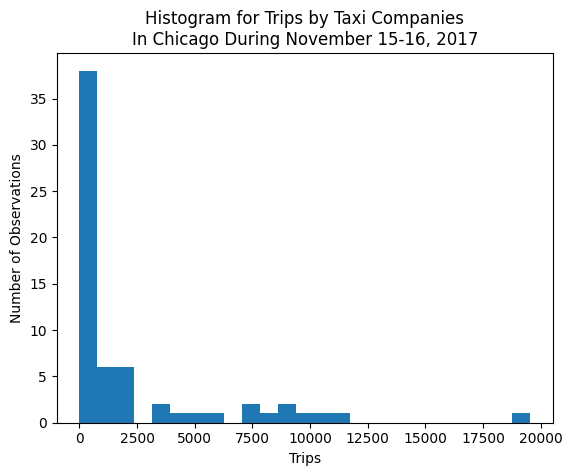

In [3]:
# Examine the df_companies dataframe

display(df_companies.info())
print()
display(df_companies)
print()
display(df_companies['company_name'].describe())
print()
display(df_companies['trips_amount'].describe())
print()
plt.hist(df_companies['trips_amount'], bins=25)
plt.xlabel('Trips')
plt.ylabel('Number of Observations')
plt.title('Histogram for Trips by Taxi Companies\nIn Chicago During November 15-16, 2017')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


count                 94
unique                94
top       Auburn Gresham
freq                   1
Name: dropoff_location_name, dtype: object

count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64

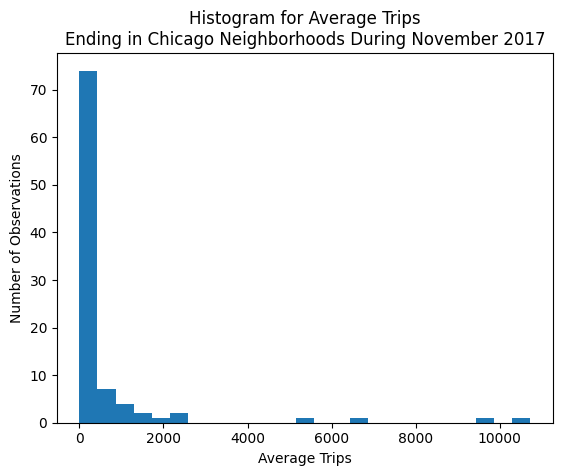

In [4]:
# Examine the df_neighborhoods dataframe

display(df_neighborhoods.info())
print()
display(df_neighborhoods)
print()
display(df_neighborhoods['dropoff_location_name'].describe())
print()
display(df_neighborhoods['average_trips'].describe())
print()
plt.hist(df_neighborhoods['average_trips'], bins=25)
plt.xlabel('Average Trips')
plt.ylabel('Number of Observations')
plt.title('Histogram for Average Trips\nEnding in Chicago Neighborhoods During November 2017')
plt.show()

In [5]:
# Examine the df_weather dataframe

display(df_weather.info())
display(df_weather)
print()
display(df_weather['start_ts'].describe())
print()
display(df_weather['weather_conditions'].describe())
print()
display(df_weather['duration_seconds'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


None

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


count                    1068
unique                     81
top       2017-11-11 10:00:00
freq                       48
first     2017-11-04 00:00:00
last      2017-11-25 23:00:00
Name: start_ts, dtype: object

count     1068
unique       2
top       Good
freq       888
Name: weather_conditions, dtype: object

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

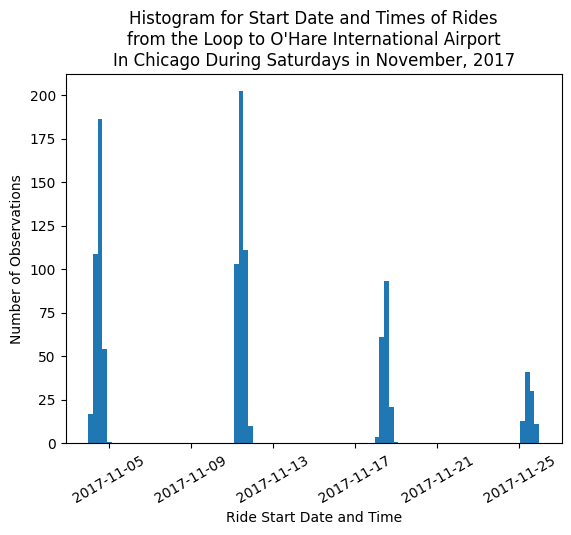

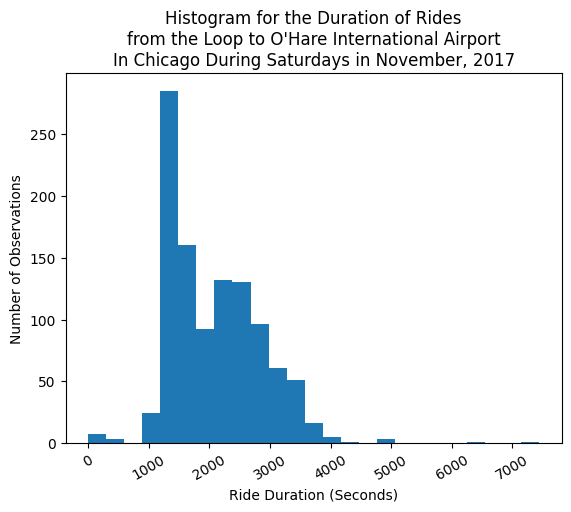

In [6]:
# Examine the df_weather dataframe with plots

plt.hist(df_weather['start_ts'], bins=96)
plt.xlabel('Ride Start Date and Time')
plt.ylabel('Number of Observations')
plt.title("Histogram for Start Date and Times of Rides\nfrom the Loop to O'Hare International Airport\nIn Chicago During Saturdays in November, 2017")
plt.xticks(rotation=30)
plt.show()

plt.hist(df_weather['duration_seconds'], bins=25)
plt.xlabel('Ride Duration (Seconds)')
plt.ylabel('Number of Observations')
plt.title("Histogram for the Duration of Rides\nfrom the Loop to O'Hare International Airport\nIn Chicago During Saturdays in November, 2017")
plt.xticks(rotation=30)
plt.show()

The data look good overall. The duration_seconds column should be integer instead of float, so I will change its data type. I imported start_ts in date format, so that is no problem, and the other data types are correct. I found no missing or obviously inappropriate values and the distributions look reasonable. 

# Prepare the Data #

In [7]:
# Change duration_seconds column to integer data type

if np.all(df_weather['duration_seconds'] == df_weather['duration_seconds'].astype(int)):
    print("Data as float and integer types are equal, so conversion is safe.")
    df_weather['duration_seconds'] = df_weather['duration_seconds'].astype(int)
else:
    print("Data as float and integer types are not equal, so conversion is NOT safe.")

print()
df_weather.info()

Data as float and integer types are equal, so conversion is safe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


# Analyze the Data #

In [8]:
# Identify the top 10 neighborhoods in terms of drop-offs

top_10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
top_10_neighborhoods.index += 1

print("Top 10 Neighborhoods:")
display(top_10_neighborhoods)

Top 10 Neighborhoods:


,dropoff_location_name,average_trips
1,Loop,10727.466667
2,River North,9523.666667
3,Streeterville,6664.666667
4,West Loop,5163.666667
5,O'Hare,2546.900000
6,Lake View,2420.966667
7,Grant Park,2068.533333
8,Museum Campus,1510.000000
9,Gold Coast,1364.233333
10,Sheffield & DePaul,1259.766667


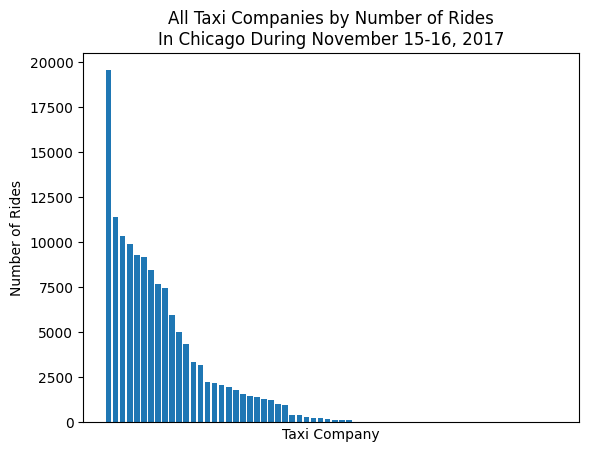

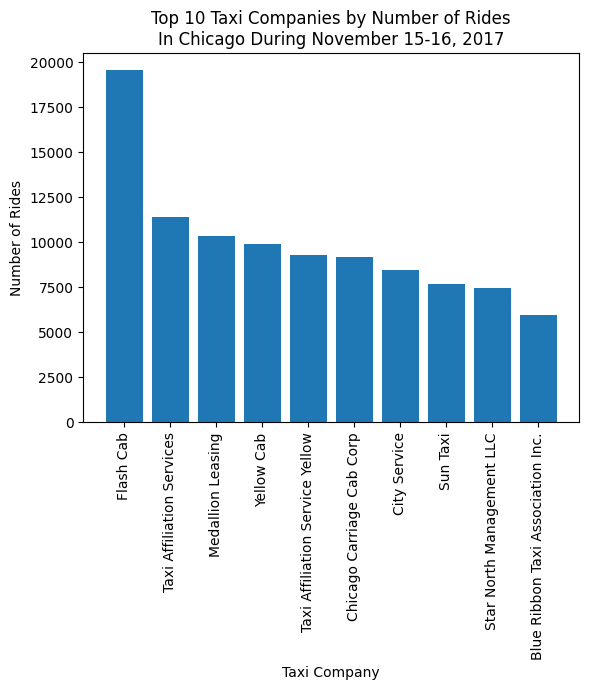

In [9]:
# Plot taxi companies by number of rides

companies = df_companies.sort_values(by='trips_amount', ascending=False)
top_10_companies = df_companies.sort_values(by='trips_amount', ascending=False).head(10)

plt.bar(companies['company_name'].values, companies['trips_amount'].values)
plt.xlabel('Taxi Company')
plt.ylabel('Number of Rides')
plt.title('All Taxi Companies by Number of Rides\nIn Chicago During November 15-16, 2017')
plt.xticks([])
plt.show()

plt.bar(top_10_companies['company_name'].values, top_10_companies['trips_amount'].values)
plt.xlabel('Taxi Company')
plt.ylabel('Number of Rides')
plt.title('Top 10 Taxi Companies by Number of Rides\nIn Chicago During November 15-16, 2017')
plt.xticks(rotation=90)
plt.show()

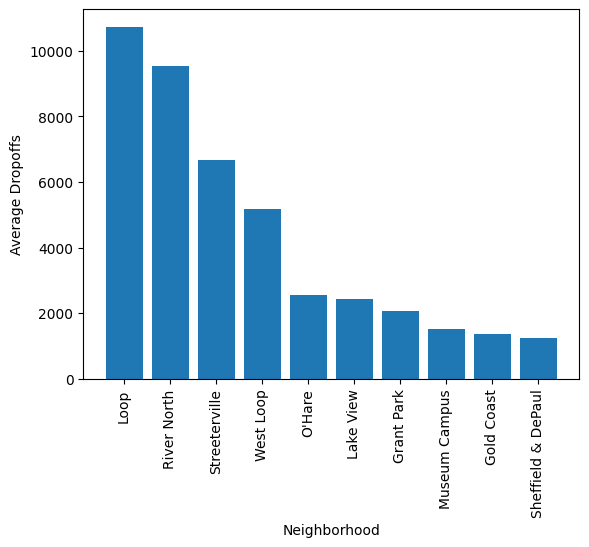

In [10]:
# Plot top 10 neighborhoods by number of dropoffs

plt.bar(top_10_neighborhoods['dropoff_location_name'].values, top_10_neighborhoods['average_trips'].values)
plt.xlabel('Neighborhood')
plt.ylabel('Average Dropoffs')
plt.xticks(rotation=90)
plt.show()

Flash Cab gave the most rides by far (19,558), followed after a large drop by a steady decline beginning with Taxi Affiliation Services (11,422) and Medallion Leasing (10,367). Only 14 out of 64 companies gave more than 2,500 rides and more than half (34) gave fewer than 250 rides. 

Average dropoffs were dominated by four neighborhoods: Loop (10,727), River North (9,524), Streeterville (6,665), and West Loop (5,164), followed after a large drop by a steady decline. Only 12 out of 94 neighborhoods averaged more than 1,000 dropoffs. 

The four dominant neighborhoods are contiguous and in the heart of Chicago, so it makes sense for them to see high traffic. Their order even makes sense with the Loop and River North in the core of downtown while Streeterville and West Loop are adjacent but slightly further afield. I speculate that Flash Cab gave so many rides because it predominantly covered those four downtown regions, but I lack the data to test that hypothesis. 

# Test Hypotheses #

In [11]:
# Test equality of variances for average duration of rides with good and bad weather

good_weather = df_weather[df_weather['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = df_weather[df_weather['weather_conditions'] == 'Bad']['duration_seconds']
levene_test = st.levene(good_weather, bad_weather, center='median')

print('Descriptives for good weather:')
display(good_weather.describe())
print()
print('Descriptives for bad weather:')
display(bad_weather.describe())
print()
print("Levene's test comparing the variances of ride duration with good and bad weather:")
print(f"t-statistic: {levene_test[0]:.2f}")
print(f"p-value: {levene_test[1]:.4f}")

Descriptives for good weather:


count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64


Descriptives for bad weather:


count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64


Levene's test comparing the variances of ride duration with good and bad weather:
t-statistic: 0.39
p-value: 0.5332


In [12]:
# Test the hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

weather_test = st.ttest_ind(good_weather, bad_weather)

print("Independent t-test comparing ride duration for good and bad weather conditions:")
print(f"t-statistic: {weather_test[0]:.2f}")
print(f"p-value: {weather_test[1]:.4f}")
print()
print(f"Mean ride duration for rides in good weather = {good_weather.mean():.2f} seconds")
print(f"Mean ride duration for rides in bad weathers = {bad_weather.mean():.2f} seconds")
print(f"Difference in means: = {bad_weather.mean() - good_weather.mean():.2f} seconds")

Independent t-test comparing ride duration for good and bad weather conditions:
t-statistic: -6.95
p-value: 0.0000

Mean ride duration for rides in good weather = 1999.68 seconds
Mean ride duration for rides in bad weathers = 2427.21 seconds
Difference in means: = 427.53 seconds


Null Hypothesis: Ride durations during good and bad weather are equal   
Alternative Hypothesis: Ride durations during good and bad weather are not equal   
Statistical Test: Independent t-test with alpha = 0.05 and equal variances assumed   
Conclusion: We can reject the null hypothesis (t = -6.95, p < 0.05)

I conclude that rides from the Loop to O'Hare International Airport on Saturdays in November, 2017 were significantly longer on average during bad weather than during good weather. The difference was a little more than seven minutes. Causality is pretty clear in this case because human behavior could not have meaningfully affected the weather. I attribute the difference mainly to drivers going slower in hazardous conditions, though other factors might also contribute. Generalizability is limited for other routes and days of the week, but I suspect the effect is robust. 

For this test, I formulated the null and alternative hypotheses in the same way they are always formulated: the null hypothesis posits no difference between conditions and the alternative hypothesis posits a difference between conditions. I relied on Levene's test to determine that the variance of ride durations did not signficantly differ according to weather conditions. I  chose the standard significance level used across the social sciences: alpha = 0.05.

# General Discussion #

The data provides some insight into the behavior of taxi passengers in Chicago during November, 2017. Rides were disproportionately concentrated in four neighborhoods (the Loop, River North, Streeterville, and West Loop) and one taxi company (Flash Cab). The distributions of rides for companies and neighborhoods were very right skewed with the top 10 representing a majority of rides in both cases. That means Zuber should focus on only a few hotspots and competitors. I would advise them to concentrate on downtown Chicago and try to cut into Flash Cab's market share. 

Rain and other bad weather conditions were significantly associated with longer rides from the Loop to O'Hare airport on Saturdays. Zuber could perhaps mention inclement weather in ads to solicit those longer rides or maybe increase prices during the rain to capitalize on them.